# hyer page 584

In [44]:
# setup 
import numpy as np
import sympy as sp
from sympy import *
from pprint import pprint
init_printing(use_latex='mathjax')

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

th,x,y,q = symbols('th,x,y,q')

Using matplotlib backend: Qt4Agg


In [45]:
# Equations of equilibrium
Nx = Function('N_x')(x,y)
Ny = Function('N_y')(x,y)
Nxy = Function('N_xy')(x,y)
Mx = Function('M_x')(x,y)
My = Function('M_y')(x,y)
Mxy = Function('M_xy')(x,y)

In [46]:
# declare symbols for equation generation
th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6 = symbols('th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6')

A11,A22,A66,A12,A16,A26,A66 = symbols('A11,A22,A66,A12,A16,A26,A66')
B11,B22,B66,B12,B16,B26,B66 = symbols('B11,B22,B66,B12,B16,B26,B66')
D11,D22,D66,D12,D16,D26,D66 = symbols('D11,D22,D66,D12,D16,D26,D66')
Nx,Ny,Nxy,Mx,My,Mxy = symbols('Nx,Ny,Nxy,Mx,My,Mxy')

##if use this, then reference  the function as u0(x), example  diff(u0(x),x,2)

u0 = Function('u0')(x,y)
v0 = Function('v0')(x,y)
w0 = Function('w0')(x,y)

In [47]:
# starting with Hyer  pg 617

In [48]:
w0 = A11 / (A11*D11-B11**2) * ( q*x**4/24 - C2*x**3/6 - (C3- B11/A11*C1)*x**2/2 - C5*x - C6 )
w0

    ⎛                              2 ⎛     B₁₁⋅C₁⎞⎞
    ⎜      3                  4   x ⋅⎜C₃ - ──────⎟⎟
    ⎜  C₂⋅x                q⋅x       ⎝      A₁₁  ⎠⎟
A₁₁⋅⎜- ───── - C₅⋅x - C₆ + ──── - ────────────────⎟
    ⎝    6                  24           2        ⎠
───────────────────────────────────────────────────
                                2                  
                   A₁₁⋅D₁₁ - B₁₁                   

In [49]:
u0 = D11/(A11*D11 - B11**2 ) *C1*x + B11/(A11*D11-B11**2) * (q*x**3/6-C2*x**2/2-C3*x)+C4/A11
u0

    ⎛      2             3⎞                       
    ⎜  C₂⋅x           q⋅x ⎟                       
B₁₁⋅⎜- ───── - C₃⋅x + ────⎟                       
    ⎝    2             6  ⎠      C₁⋅D₁₁⋅x       C₄
─────────────────────────── + ────────────── + ───
                    2                      2   A₁₁
       A₁₁⋅D₁₁ - B₁₁          A₁₁⋅D₁₁ - B₁₁       

In [50]:
Nx = C1
Nx

C₁

In [51]:
Mx = -q*x**2/2+C2*x+C3
Mx

               2
            q⋅x 
C₂⋅x + C₃ - ────
             2  

In [52]:
bc1 = Mx.subs(x,a/2)

In [53]:
bc2 = Mx.subs(x,-a/2)

In [54]:
bc12 = solve([bc1, bc2], [C2,C3])
bc12

⎧            2  ⎫
⎪           a ⋅q⎪
⎨C₂: 0, C₃: ────⎬
⎪            8  ⎪
⎩               ⎭

In [55]:
C2_ =bc12[C2] ;  Eq(C2, bc12[C2])

C₂ = 0

In [56]:
C3_ = bc12[C3] ; Eq(C3, bc12[C3])

      2  
     a ⋅q
C₃ = ────
      8  

In [57]:
bc3 = u0.subs(x,a/2)
bc3

    ⎛      2           3  ⎞                           
    ⎜  C₂⋅a    C₃⋅a   a ⋅q⎟                           
B₁₁⋅⎜- ───── - ──── + ────⎟                           
    ⎝    8      2      48 ⎠        C₁⋅D₁₁⋅a         C₄
─────────────────────────── + ────────────────── + ───
                    2           ⎛             2⎞   A₁₁
       A₁₁⋅D₁₁ - B₁₁          2⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠      

In [58]:
bc4 = u0.subs(x,-a/2)
bc4

    ⎛      2           3  ⎞                           
    ⎜  C₂⋅a    C₃⋅a   a ⋅q⎟                           
B₁₁⋅⎜- ───── + ──── - ────⎟                           
    ⎝    8      2      48 ⎠        C₁⋅D₁₁⋅a         C₄
─────────────────────────── - ────────────────── + ───
                    2           ⎛             2⎞   A₁₁
       A₁₁⋅D₁₁ - B₁₁          2⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠      

In [59]:
bc34 = solve([bc3,bc4], [C1,C4])
bc34

⎧        ⎛         2  ⎞                    2   ⎫
⎪    B₁₁⋅⎝24⋅C₃ - a ⋅q⎠        A₁₁⋅B₁₁⋅C₂⋅a    ⎪
⎨C₁: ──────────────────, C₄: ──────────────────⎬
⎪          24⋅D₁₁              ⎛             2⎞⎪
⎩                            8⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠⎭

In [60]:
C1_ = bc34[C1].subs(C3,C3_) ; Eq(C1, C1_)

          2  
     B₁₁⋅a ⋅q
C₁ = ────────
      12⋅D₁₁ 

In [61]:
C4_ = bc34[C4].subs(C2,C2_) ; Eq(C4, C4_)

C₄ = 0

In [62]:
bc5 = w0.subs(x,a/2)
bc5

    ⎛                              2 ⎛     B₁₁⋅C₁⎞⎞
    ⎜      3                4     a ⋅⎜C₃ - ──────⎟⎟
    ⎜  C₂⋅a    C₅⋅a        a ⋅q      ⎝      A₁₁  ⎠⎟
A₁₁⋅⎜- ───── - ──── - C₆ + ──── - ────────────────⎟
    ⎝    48     2          384           8        ⎠
───────────────────────────────────────────────────
                                2                  
                   A₁₁⋅D₁₁ - B₁₁                   

In [63]:
bc6 = w0.subs(x,-a/2)
bc6

    ⎛                            2 ⎛     B₁₁⋅C₁⎞⎞
    ⎜    3                4     a ⋅⎜C₃ - ──────⎟⎟
    ⎜C₂⋅a    C₅⋅a        a ⋅q      ⎝      A₁₁  ⎠⎟
A₁₁⋅⎜───── + ──── - C₆ + ──── - ────────────────⎟
    ⎝  48     2          384           8        ⎠
─────────────────────────────────────────────────
                               2                 
                  A₁₁⋅D₁₁ - B₁₁                  

In [64]:
bc56 = solve([bc5,bc6], [C5,C6])
bc56

⎧         2        2 ⎛                  2              ⎞⎫
⎪    -C₂⋅a        a ⋅⎝-48⋅A₁₁⋅C₃ + A₁₁⋅a ⋅q + 48⋅B₁₁⋅C₁⎠⎪
⎨C₅: ───────, C₆: ──────────────────────────────────────⎬
⎪       24                       384⋅A₁₁                ⎪
⎩                                                       ⎭

In [65]:
C5_ = bc56[C5].subs(C2,C2_)   ; Eq(C5, C5_)

C₅ = 0

In [66]:
C6_ = bc56[C6].subs(C3,C3_).subs(C1,C1_)   ; Eq(C6, C6_)

        ⎛                    2  2  ⎞
      2 ⎜         2     4⋅B₁₁ ⋅a ⋅q⎟
     a ⋅⎜- 5⋅A₁₁⋅a ⋅q + ───────────⎟
        ⎝                   D₁₁    ⎠
C₆ = ───────────────────────────────
                 384⋅A₁₁            

In [67]:
u0f = u0.subs({a:2, b:6, q:1,  C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_})
u0f

                          ⎛ 3    ⎞ 
                          ⎜x    x⎟ 
                      B₁₁⋅⎜── - ─⎟ 
      B₁₁⋅x               ⎝6    2⎠ 
────────────────── + ──────────────
  ⎛             2⎞                2
3⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠   A₁₁⋅D₁₁ - B₁₁ 

In [68]:
w0f = w0.subs({C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_ })
w0f

    ⎛          ⎛ 2        2  2   ⎞      ⎛                    2  2  ⎞⎞
    ⎜        2 ⎜a ⋅q   B₁₁ ⋅a ⋅q ⎟    2 ⎜         2     4⋅B₁₁ ⋅a ⋅q⎟⎟
    ⎜   4   x ⋅⎜──── - ──────────⎟   a ⋅⎜- 5⋅A₁₁⋅a ⋅q + ───────────⎟⎟
    ⎜q⋅x       ⎝ 8     12⋅A₁₁⋅D₁₁⎠      ⎝                   D₁₁    ⎠⎟
A₁₁⋅⎜──── - ────────────────────── - ───────────────────────────────⎟
    ⎝ 24              2                          384⋅A₁₁            ⎠
─────────────────────────────────────────────────────────────────────
                                         2                           
                            A₁₁⋅D₁₁ - B₁₁                            

In [69]:
a_ = 2
b_ = 10
q_ = -5
ABD= np.array([[  1.0240e+08,   1.8945e+07,  -1.8626e-09,  -5.4570e-12,  -1.3642e-12,   0.0000e+00],
               [  1.8945e+07,   1.6250e+07,  -9.3132e-10,  -1.3642e-12,  -1.3642e-12,   0.0000e+00],
               [ -1.8626e-09,  -9.3132e-10,   2.0191e+07,   0.0000e+00,   1.1369e-13,  -1.3642e-12],
               [ -5.4570e-12,  -1.3642e-12,   0.0000e+00,   5.7792e+00,   1.7657e+00,   1.2611e+00],
               [ -1.3642e-12,  -1.3642e-12,   0.0000e+00,   1.7657e+00,   1.2561e+00,   4.1768e-01],
               [  0.0000e+00,   1.1369e-13,  -1.3642e-12,   1.2611e+00,   4.1768e-01,   1.8498e+00]])
A = ABD[0:3,0:3]
B = ABD[0:3,3:6]
D = ABD[3:6,3:6]
A11_ = A[0,0]
B11_ = B[0,0]
D11_ = D[0,0]

In [77]:
w0n = sp.lambdify(x, w0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_}) , "numpy")
u0n = sp.lambdify(x, u0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_}) , "numpy")

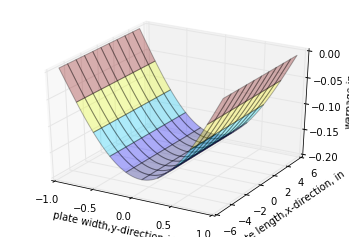

In [97]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.pyplot as plt
### warpage
res = 100
Xplt,Yplt = np.meshgrid(np.linspace(-a_/2,a_/2,res), np.linspace(-b_/2,b_/2,res))
### dispalcement
fig = plt.figure('plate-warpage')
ax = fig.gca(projection='3d')
ax.plot_surface(Xplt, Yplt, w0n(Xplt), cmap=mpl.cm.jet, alpha=0.3)
ax.set_xlabel('plate width,y-direction,in')
ax.set_ylabel('plate length,x-direction, in')
ax.set_zlabel('warpage,in')
plt.show()

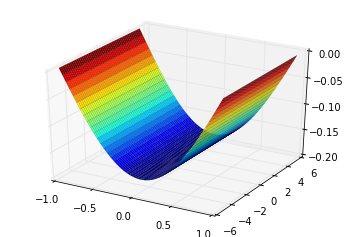

In [98]:
# Sympy 3d plots
from sympy.plotting import plot3d
w0plot = w0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_})
plot3d(w0plot, (x,-a_/2,a_/2), (y,-b_/2,b_/2))